In [1]:
import anndata
import numpy as np
import sys
import torch
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/home/gyichen/velovae')
sys.path

['/sw/arcts/centos7/python3.6-anaconda/5.2.0/lib/python36.zip',
 '/sw/arcts/centos7/python3.6-anaconda/5.2.0/lib/python3.6',
 '/sw/arcts/centos7/python3.6-anaconda/5.2.0/lib/python3.6/lib-dynload',
 '',
 '/home/gyichen/.local/lib/python3.6/site-packages',
 '/sw/arcts/centos7/python3.6-anaconda/5.2.0/lib/python3.6/site-packages',
 '/home/gyichen/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/gyichen/.ipython',
 '/home/gyichen/velovae']

In [3]:
import velovae as vv

In [4]:
dataset = 'Braindev'
adata = anndata.read_h5ad(f'/scratch/blaauw_root/blaauw1/gyichen/output.h5ad')
U, S = adata.layers["Mu"], adata.layers["Ms"]

In [5]:
#Load the trained model
checkpoints = [f'../checkpoints/{dataset}/Default/encoder_vanilla.pt', 
               f'../checkpoints/{dataset}/Default/decoder_vanilla.pt']
model = vv.VanillaVAE(adata, 20, hidden_size=(1000, 500), tprior='tprior', device='cpu', checkpoints=checkpoints)

Using informative time prior.


In [6]:
data_in = torch.tensor(np.concatenate((U, S),1))
mu_tx, std_tx, t_global, ton, toff, uhat, shat = model.forward(data_in,True)

In [7]:
uhat = uhat.detach().numpy()
shat = shat.detach().numpy()
t = t_global.detach().numpy().squeeze()

In [9]:
cell_labels = adata.obs['clusters'].to_numpy()
cell_types = np.unique(cell_labels)

Nid1


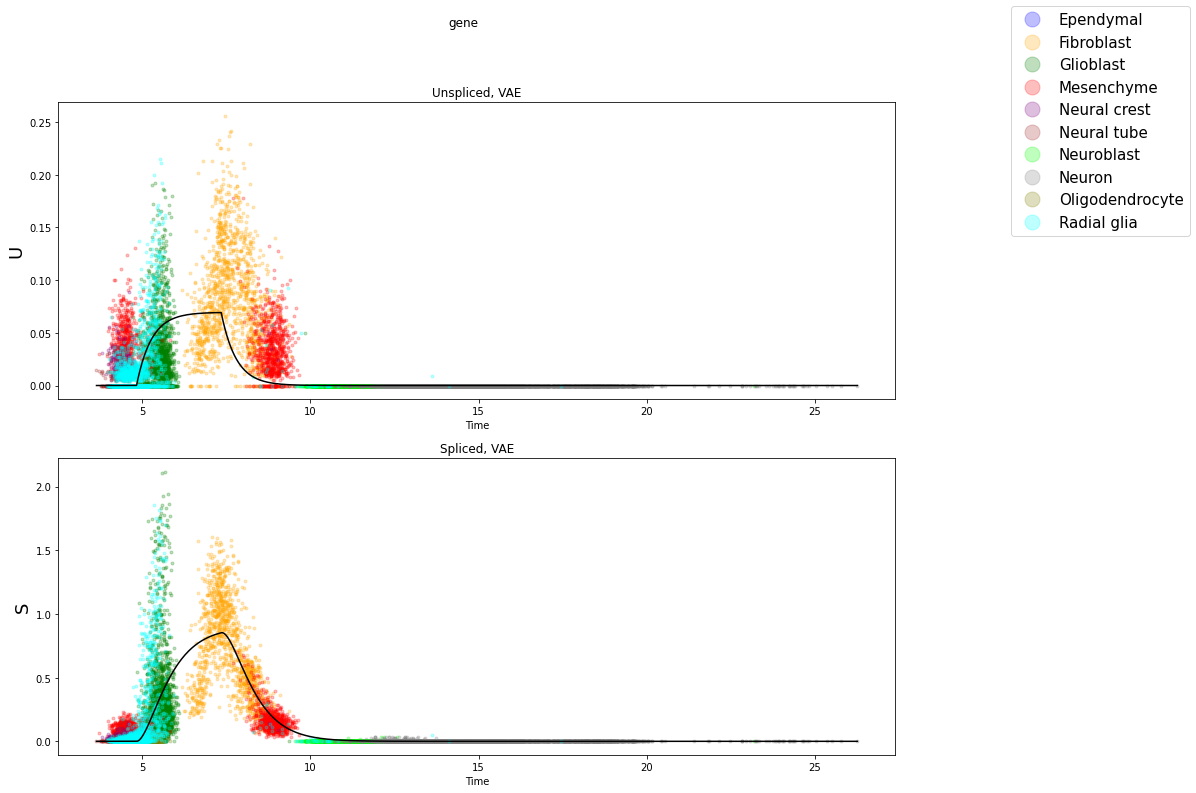

In [135]:
#gidx = np.random.choice(adata.n_vars)
gidx=136
print(adata.var_names[gidx])
fig = vv.plotting.plotSig_(t, U[:,gidx], S[:,gidx], cell_labels,
                     t, uhat[:, gidx], shat[:, gidx])

In [136]:
fig.savefig(f'../figures/Braindev/Debug/{adata.var_names[gidx]}.png')

In [98]:
import scvelo as scv

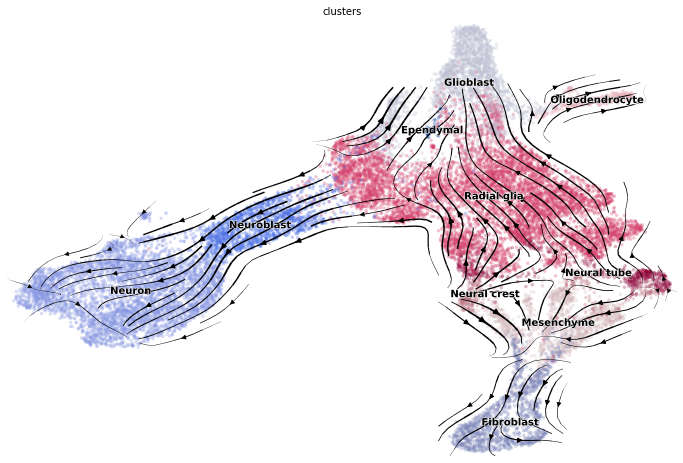

In [100]:
scv.pl.velocity_embedding_stream(adata, basis='umap', figsize=(12,8))

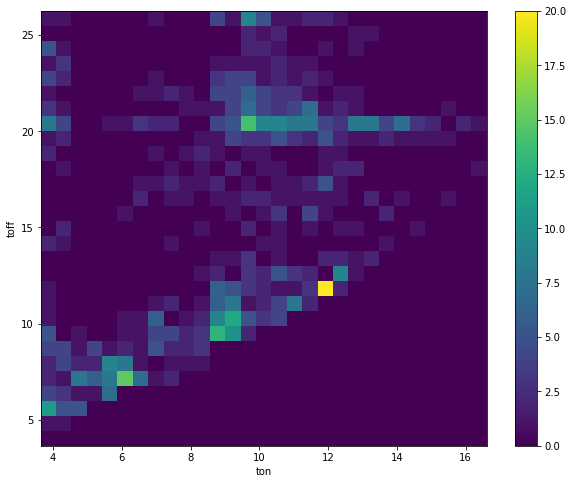

In [155]:
toff = adata.var['vanilla_t_']
ton = adata.var['vanilla_ton']
b1 = np.linspace(t.min(), ton.max(), 30)
b2 =  np.linspace(t.min(), t.max(), 30)
plt.figure(figsize=(10,8))
plt.hist2d(ton, toff, bins=[b1, b2])
plt.colorbar()
plt.xlabel('ton')
plt.ylabel('toff')
plt.show()

In [4]:
adata = anndata.read_h5ad('/scratch/blaauw_root/blaauw1/gyichen/output_vanillapp.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 19796 × 1000
    obs: 'Age', 'CellCycle', 'Cell_Conc', 'Chemistry', 'ChipID', 'Class', 'ClusterName', 'Clusters', 'Date_Captured', 'DonorID', 'DoubletFinderPCA', 'HPF_LogPP', 'IsCycling', 'Label', 'Location_E9_E11', 'NCellsCluster', 'NGenes', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'PseudoAge', 'PseudoTissue', 'Region', 'SampleID', 'SampleName', 'Sample_Index', 'Sex', 'Species', 'Split', 'Strain', 'Subclass', 'Target_Num_Cells', 'Tissue', 'TotalUMI', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'vanilla_time', 'vanilla_std_t', 'tprior', 'vanillapp_time', 'vanillapp_std_t'
    var: 'Accession', 'Chromosome', 'End', 'Gamma', 'Selected', 'Start', 'Strand', 'Valid', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fi

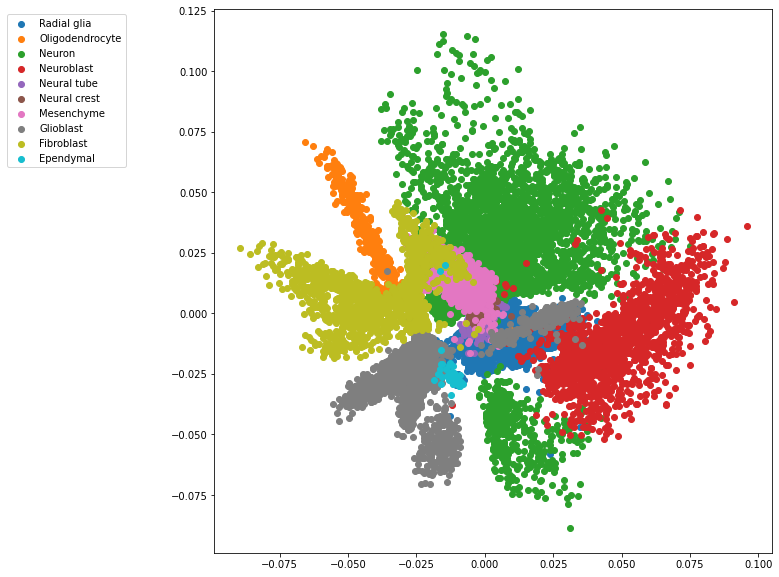

In [8]:
Z = adata.obsm['vanillapp_z']
cell_labels = adata.obs['clusters'].to_numpy()
cell_types = np.unique(cell_labels)
fig=plt.figure(figsize=(10,10))
for i,x in enumerate(np.flip(cell_types)):
    plt.scatter(Z[cell_labels==x,0], Z[cell_labels==x,1], label=x)
plt.legend(bbox_to_anchor=(-0.15,1.0), loc='upper right')
plt.show()

In [9]:
fig.savefig('../figures/Braindev/z.png')